# Machine Learning-Youtube Views Prediction

**Objective**<br>
* Build model to predict video views based on statistical numbers and other attributes.

**About dataset**
* This dataset is obtained from [Trending YouTube Video Statistics | Kaggle](https://www.kaggle.com/datasnaek/youtube-new)

**Main Instructions**
* Exploratory analysis from the data, create some visualization to describe the data
* Describe the pre-processing steps, also the reason behind them
* Split the data into training and testing with optional portion
* Build the models with matching hyperparameter tune, choose the best model, also the reason behind that
* Test the model with data test

In [2]:
#Make Necessary Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.4
pandas version :  2.0.3
seaborn version :  0.13.0


# Load and Describe Data

In [7]:
data = pd.read_csv('C:\\Users\\dell\\Downloads\\Tech-Projects-Portfolio\\end2end-ml\\notebook\\data\\merged_data_youtube.csv')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26.0,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24.0,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17.0,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.0,193.0,12.0,37.0,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25.0,2017-11-13T01:45:13.000Z,[none],9815.0,30.0,2.0,30.0,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [8]:
print('There are',str(len(data)), 'rows in this dataset')

There are 667660 rows in this dataset


In [9]:
data['len_title'] = data['channel_title'].str.len()
data['desc_len'] = data['description'].str.len()


Converting views , likes , dislikes column into float64 

In [10]:
columns_to_convert =  ["views","likes","dislikes"]

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

## Describe Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667660 entries, 0 to 667659
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                649327 non-null  object 
 1   trending_date           383947 non-null  object 
 2   title                   383947 non-null  object 
 3   channel_title           383947 non-null  object 
 4   category_id             383947 non-null  float64
 5   publish_time            383947 non-null  object 
 6   tags                    383947 non-null  object 
 7   views                   383945 non-null  float64
 8   likes                   383945 non-null  float64
 9   dislikes                383945 non-null  float64
 10  comment_count           383945 non-null  float64
 11  thumbnail_link          383945 non-null  object 
 12  comments_disabled       383945 non-null  object 
 13  ratings_disabled        383945 non-null  object 
 14  video_error_or_remov

**Conclusion**</br>
* Dataframe have 17 columns
* Dataframe have 667660 rows
* Total categorical columns are 11 columns
* Total numerical columns are 7 columns
* `views` column is the target for this dataset

# Exploratory Data Analysis

## Statistical Summary

### Separation of Categorical and Numerical Data

In [12]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_time']
nums = ['category_id','views','likes','dislikes','comment_count','desc_len','len_title']

### Statistical Numerical Data

In [13]:
data[nums].describe()

,category_id,views,likes,dislikes,comment_count,desc_len,len_title
count,383947.000000,3.839450e+05,3.839450e+05,3.839450e+05,3.839450e+05,364467.000000,383947.000000
mean,20.276986,1.299403e+06,3.711651e+04,2.082818e+03,4.169396e+03,917.992861,14.655119
std,7.081993,7.026663e+06,1.637646e+05,2.225078e+04,2.519866e+04,939.864971,8.694935
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,17.000000,4.341100e+04,6.970000e+02,4.100000e+01,1.100000e+02,280.000000,9.000000
50%,23.000000,1.681850e+05,3.232000e+03,1.690000e+02,4.830000e+02,633.000000,13.000000
75%,24.000000,6.276730e+05,1.683900e+04,7.230000e+02,1.943000e+03,1234.000000,17.000000
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,11938.000000,151.000000


**Conclusion from Statistical Numerical Data**<br>

* The distribution of data for feature `views`, `likes`, `dislikes`, `comment_count`, `desc_len`, and `len_title` looks skewed *(mean & median are not close enough)*

### Statistical Categorical Data

In [14]:
data[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_time
count,383947,383947,383947,383947,383947,383945,383945,383945,364467,383947
unique,206,188647,38156,169287,144038,2,2,2,159311,169287
top,18.04.06,Saludando Y Hablando Sobre El VolcÃ¡n Que Iso ...,Videos Chapin,2018-06-04T02:13:48.000Z,[none],False,False,False,+502 5737-2405 YAKI | +502 5182 0420...,2018-06-04T02:13:48.000Z
freq,8447,6562,6573,6562,37698,375482,376637,383692,6562,6562


**Categorical Data Conclusion**</br>
* Data in `trending_date` has 206 unique values
* Data in `title` has 188647 unique values
* Data in `channel_title` has 38156 unique values
* Data in `publish_time` has 169287 unique values
* Data in `tags` has 144038 unique values
* Data in `comments_disabled` has 2 unique values with majority is False value
* Data in `ratings_disabled` has 2 unique values with majority is False value
* Data in `video_error_or_removed` has 2 unique values with majority is False value
* Data in `description` has 159311 unique values
* Data in `publish_date` has 169287 unique values

## Graphical Approaching

### Univariate Analysis

In [15]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'len_title', 'desc_len'],
      dtype='object')

(667660, 7)


,category_id,views,likes,dislikes,comment_count,len_title,desc_len
0,26.0,7224515.0,55681.0,10247.0,9479.0,10.0,821.0
1,24.0,1053632.0,25561.0,2294.0,2757.0,19.0,417.0
2,10.0,17158579.0,787420.0,43420.0,125882.0,10.0,594.0


In [16]:
# assign the categorical data into cats object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

(667660, 11)


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


In [17]:
data[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667660 entries, 0 to 667659
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category_id    383947 non-null  float64
 1   views          383945 non-null  float64
 2   likes          383945 non-null  float64
 3   dislikes       383945 non-null  float64
 4   comment_count  383945 non-null  float64
 5   desc_len       364467 non-null  float64
 6   len_title      383947 non-null  float64
dtypes: float64(7)
memory usage: 35.7 MB


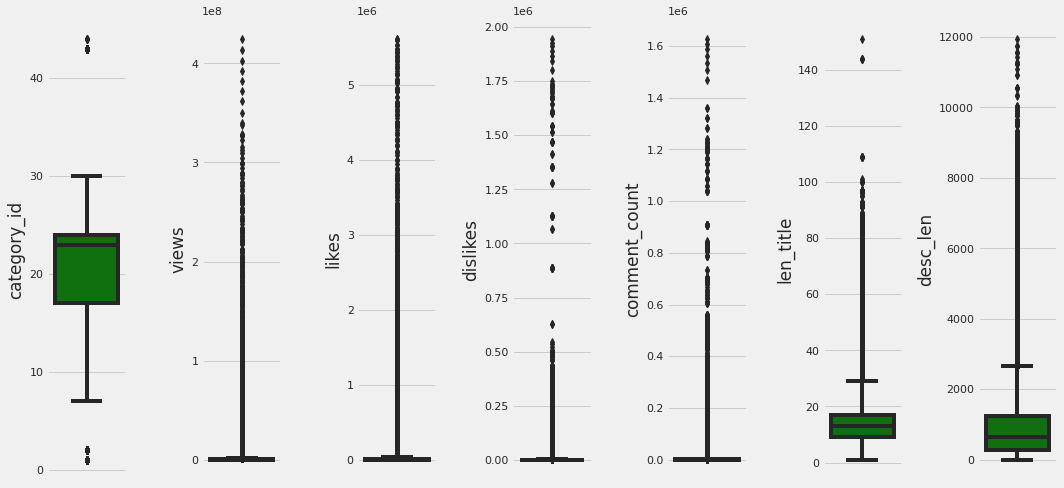

In [18]:
# look at the distribution of data with boxplot
features = ['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'len_title', 'desc_len']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout();
#plt.savefig('fig/boxplot.png')

It can be seen in the boxplot graph above that the `view`, `likes`, `dislikes`, `comment_count`, `o_tags`, and `desc_len` features have many outliers so that logarithmic transformations are needed for these features.

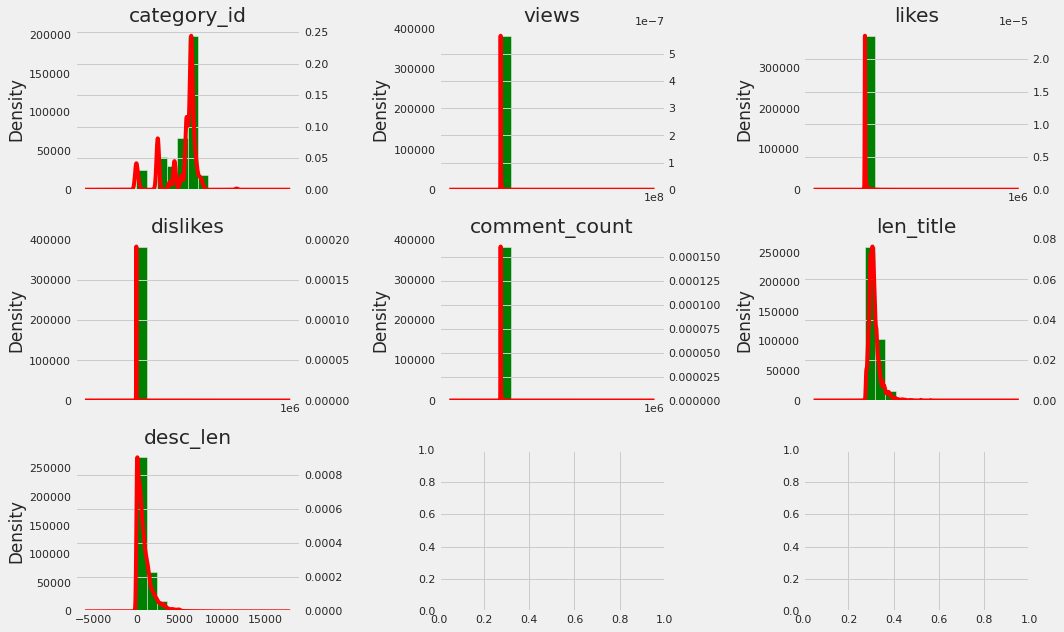

In [19]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout();
#plt.savefig('fig/distribusi data.png')

In the data distribution of numerical features, it can be seen that there are several features that are positively skewed and `len_title` feature that is negatively skewed.

In [20]:
#look for unique values from each categorical data
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

,fitur,unik nilai
2,title,188647
6,thumbnail_link,185689
0,video_id,185388
4,publish_time,169287
10,description,159311
5,tags,144038
3,channel_title,38156
1,trending_date,206
7,comments_disabled,2
8,ratings_disabled,2


### Multivariate Analysis

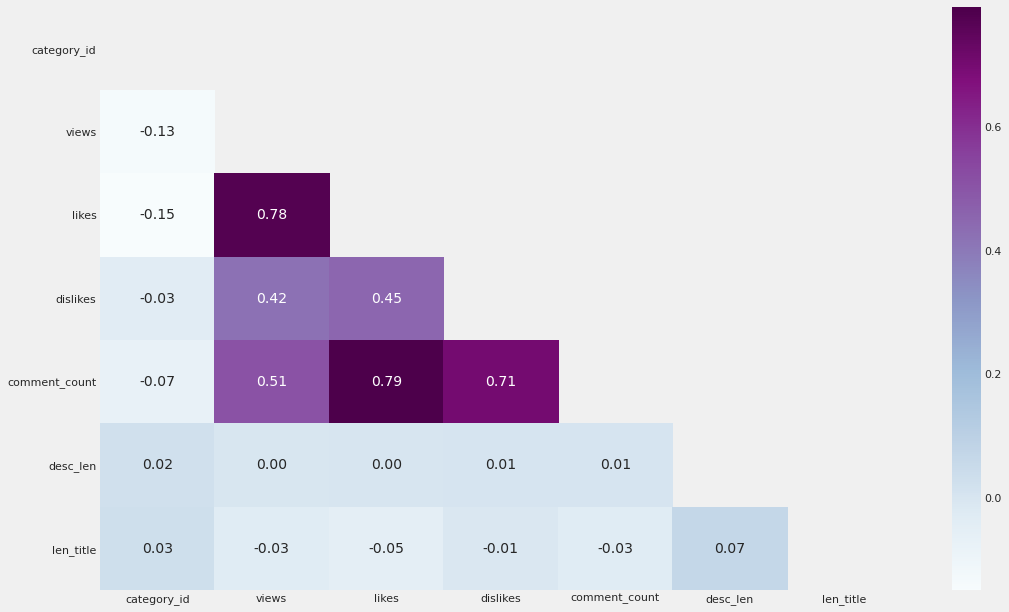

In [21]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count','desc_len','len_title']
corr_= data[features].corr()
mask = np.triu(np.ones_like(corr_, dtype=bool))

plt.figure(figsize=(16,10))
sns.heatmap(corr_,mask= mask,annot=True, fmt = ".2f", cmap = "BuPu");
#plt.savefig('fig/heatmap.png');

There are 3 features that have a strong positive correlation to `views`, namely the `likes`, `dislikes`, and `comment_count` features

<Figure size 720x576 with 0 Axes>

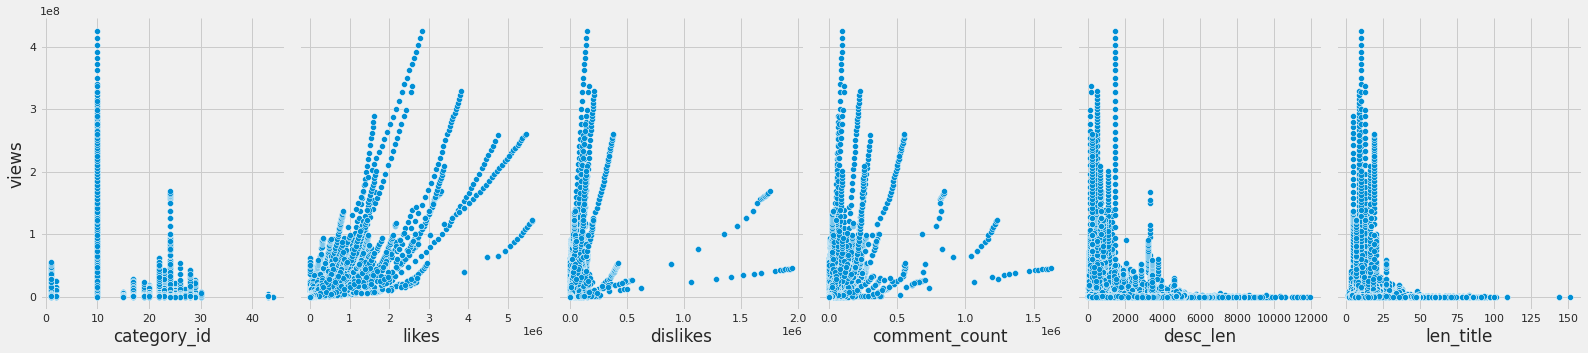

In [22]:
#create a pairplot graph from each numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['category_id','likes','dislikes','comment_count','desc_len','len_title'], y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();
#plt.savefig('fig/pairplot.png')

**Simple EDA**

**In some boxplot charts it can be seen that the data distribution is uneven and has lots of outliers and it can also be seen that the data distribution on the `Desc_len` and `len_title` features is quite skewed.**

**Then when we look at the heatmap, we can see that there are several features that are positively correlated with the views of a video, such as `likes`, `dislikes`, `comment_count` and `desc_len`, so maybe some of these features are of feature importance for doing machine learning modeling**

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667660 entries, 0 to 667659
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                649327 non-null  object 
 1   trending_date           383947 non-null  object 
 2   title                   383947 non-null  object 
 3   channel_title           383947 non-null  object 
 4   category_id             383947 non-null  float64
 5   publish_time            383947 non-null  object 
 6   tags                    383947 non-null  object 
 7   views                   383945 non-null  float64
 8   likes                   383945 non-null  float64
 9   dislikes                383945 non-null  float64
 10  comment_count           383945 non-null  float64
 11  thumbnail_link          383945 non-null  object 
 12  comments_disabled       383945 non-null  object 
 13  ratings_disabled        383945 non-null  object 
 14  video_error_or_remov

In [24]:
X = data.drop('views' , axis =1)

In [25]:
y = data["views"]

In [ ]:
rf_model = RandomForestRegressor()

rf_model.fit(X,y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop("views" , axis = 1)

y = data["views"]

rf_model = RandomForestRegressor()

rf_model.fit(X,y)

# Data Preparation

In [26]:
#see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,video_id,18333
1,trending_date,283713
2,title,283713
3,channel_title,283713
4,category_id,283713
5,publish_time,283713
6,tags,283713
7,views,283715
8,likes,283715
9,dislikes,283715


In [27]:
#see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,desc_len,303193,45.41
1,description,303193,45.41
2,trending_date,283713,42.49
3,len_title,283713,42.49
4,video_error_or_removed,283715,42.49
5,ratings_disabled,283715,42.49
6,comments_disabled,283715,42.49
7,thumbnail_link,283715,42.49
8,comment_count,283715,42.49
9,dislikes,283715,42.49


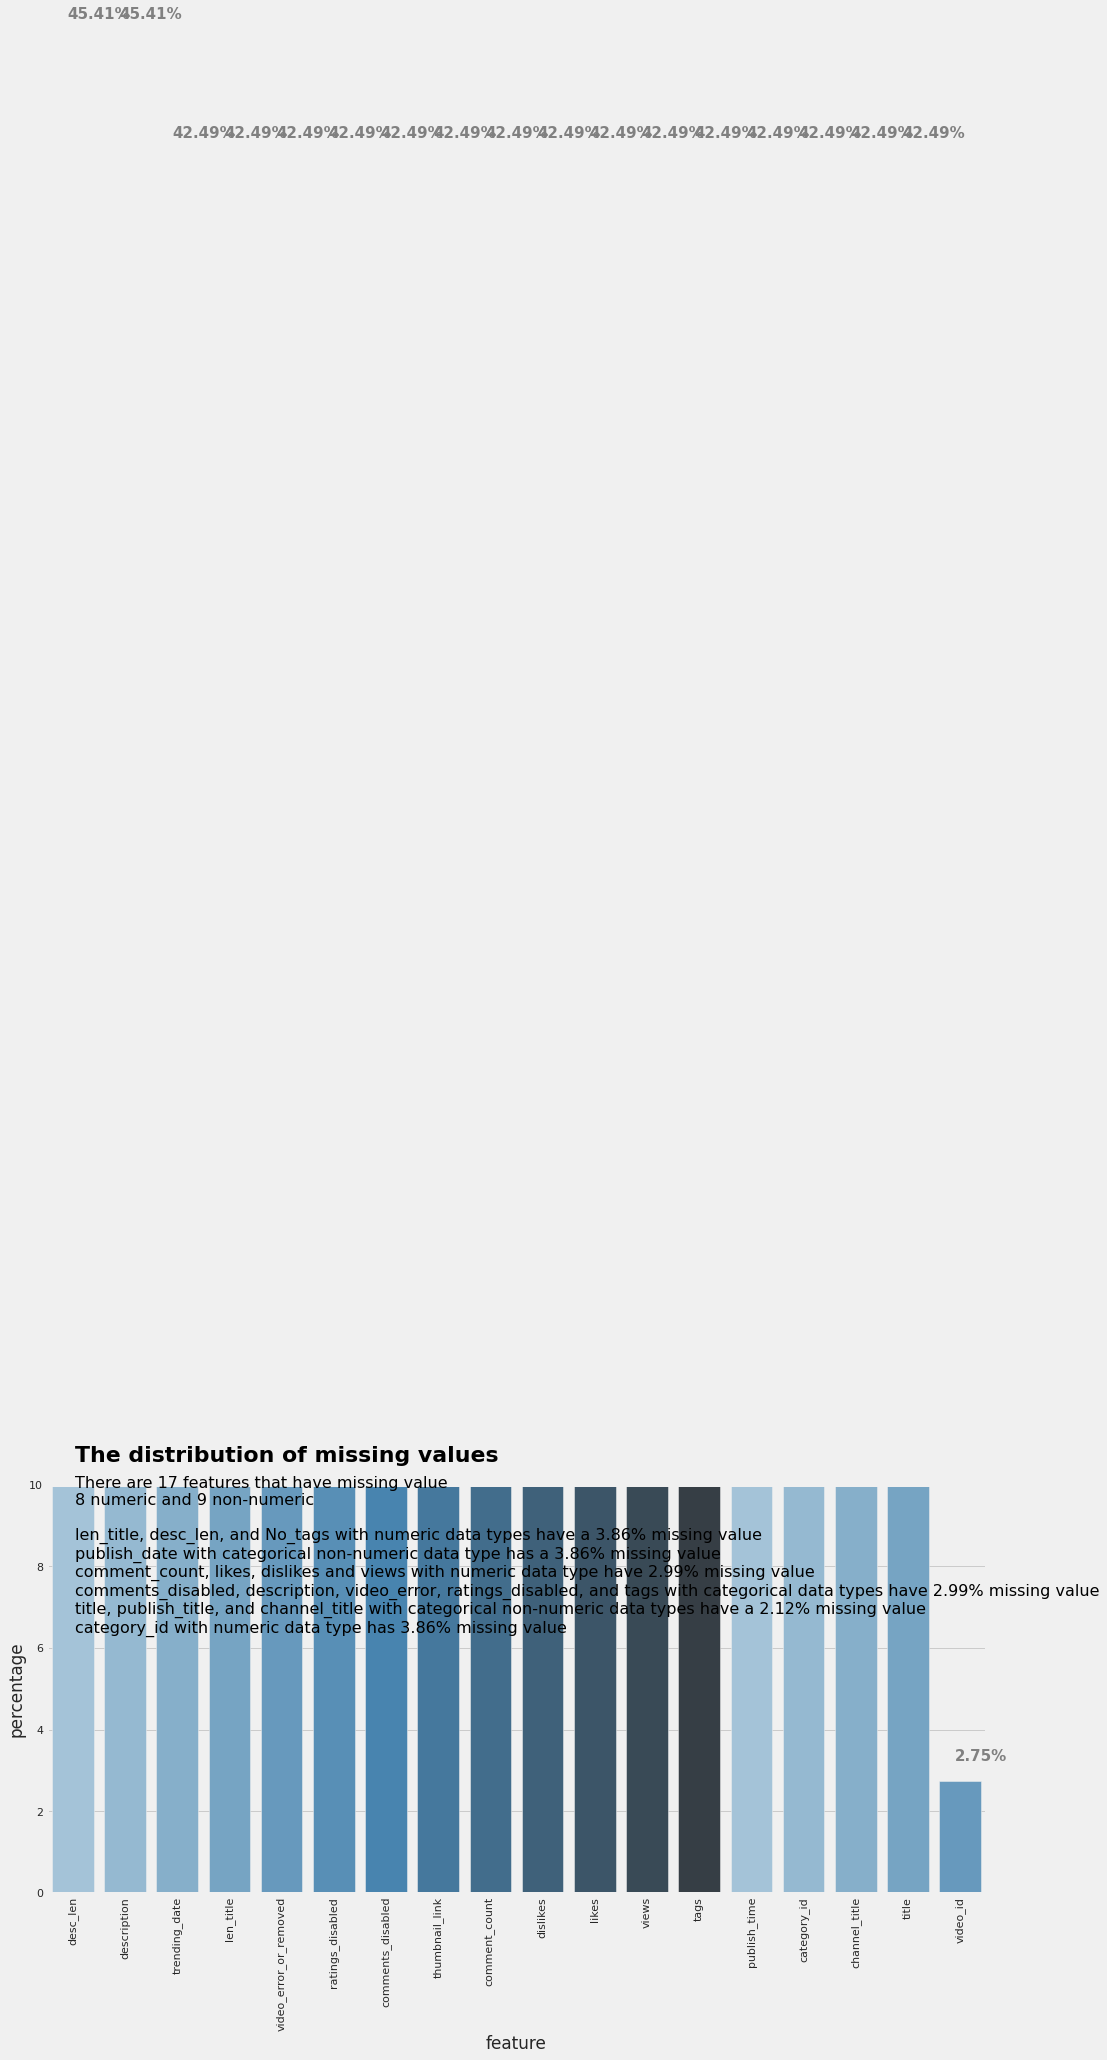

In [28]:
#View the distribution of missing values using the barplot
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+0.5, str(v)+'%', fontsize = 15, color='gray', fontweight='bold')
    
title = '''
The distribution of missing values
'''
ax.text(0.05,10,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')    

text = '''
There are 17 features that have missing value
8 numeric and 9 non-numeric

len_title, desc_len, and No_tags with numeric data types have a 3.86% missing value
publish_date with categorical non-numeric data type has a 3.86% missing value
comment_count, likes, dislikes and views with numeric data type have 2.99% missing value
comments_disabled, description, video_error, ratings_disabled, and tags with categorical data types have 2.99% missing value
title, publish_title, and channel_title with categorical non-numeric data types have a 2.12% missing value
category_id with numeric data type has 3.86% missing value

'''
ax.text(0.05,5.5,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

ax.set_ylim(0,10)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout;
#plt.savefig('fig/distribusi nilai hilang.png');

## Drop Column 


In [31]:
#dropping category_id, publish_date, description, tags, title, channel_title
data_clean = data.drop(['description','title','channel_title','tags','publish_time'], axis=1)

In [32]:
data_clean

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,len_title,desc_len
0,Jw1Y-zhQURU,17.14.11,26.0,7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,10.0,821.0
1,3s1rvMFUweQ,17.14.11,24.0,1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,19.0,417.0
2,n1WpP7iowLc,17.14.11,10.0,17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,10.0,594.0
3,PUTEiSjKwJU,17.14.11,17.0,27833.0,193.0,12.0,37.0,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,26.0,396.0
4,rHwDegptbI4,17.14.11,25.0,9815.0,30.0,2.0,30.0,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,16.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667655,sGolxsMSGfQ,18.14.06,24.0,80685.0,1701.0,99.0,1312.0,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,15.0,502.0
667656,8HNuRNi8t70,18.14.06,24.0,103339.0,460.0,66.0,51.0,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,16.0,213.0
667657,GWlKEM3m2EE,18.14.06,20.0,773347.0,25900.0,224.0,3881.0,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,14.0,763.0
667658,lbMKLzQ4cNQ,18.14.06,25.0,115225.0,2115.0,182.0,1672.0,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,15.0,1785.0


the `publish_time`, `publish_date`, `description`, `tags`, `title`, `channel_title` features are removed because they have a very large number of unique values, so it is assumed that each row of data has a different value.

## Filling Missing Column with Mode

In [33]:
data_clean['comments_disabled'].value_counts()

False    375482
True       8463
Name: comments_disabled, dtype: int64

In [47]:
data_clean['comments_disabled'].isnull().sum()

0

In [34]:
#fill in the comments_disabled value with mode
data_clean['comments_disabled'] = data_clean['comments_disabled'].fillna(data_clean['comments_disabled'].mode()[0])

In [46]:
data_clean['comments_disabled'].isnull().sum()

0

In [39]:
data_clean['comments_disabled'].value_counts()

False    659197
True       8463
Name: comments_disabled, dtype: int64

In [50]:
data_clean['video_error_or_removed'].isnull().sum()

0

In [40]:
data_clean['video_error_or_removed'].value_counts()

False    383692
True        253
Name: video_error_or_removed, dtype: int64

In [51]:
data_clean['video_error_or_removed'].isnull().sum()

0

In [41]:
#fill in the video_error_or_removed value with mode
data_clean['video_error_or_removed'] = data_clean['video_error_or_removed'].fillna(data_clean['video_error_or_removed'].mode()[0])

In [52]:
data_clean['video_error_or_removed'].isnull().sum()

0

In [42]:
data_clean['video_error_or_removed'].value_counts()

False    667407
True        253
Name: video_error_or_removed, dtype: int64

In [43]:
data_clean['ratings_disabled'].value_counts()

False    376637
True       7308
Name: ratings_disabled, dtype: int64

In [53]:
data_clean['ratings_disabled'].isnull().sum()

0

In [44]:
#fill in the ratings_disabled value with mode
data_clean['ratings_disabled'] = data_clean['ratings_disabled'].fillna(data_clean['ratings_disabled'].mode()[0])

In [54]:
data_clean['ratings_disabled'].isnull().sum()

0

In [55]:
data_clean['ratings_disabled'].value_counts()

False    660352
True       7308
Name: ratings_disabled, dtype: int64

## Filling Missing Column with Median


In [56]:
data_clean.isnull().sum()

video_id                   18333
trending_date             283713
category_id               283713
views                     283715
likes                     283715
dislikes                  283715
comment_count             283715
thumbnail_link            283715
comments_disabled              0
ratings_disabled               0
video_error_or_removed         0
len_title                 283713
desc_len                  303193
dtype: int64

In [57]:
#fill in the missing value with median
data_clean.fillna(data_clean.median(), inplace=True)
data_clean.head(3)

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,len_title,desc_len
0,Jw1Y-zhQURU,17.14.11,26.0,7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,10.0,821.0
1,3s1rvMFUweQ,17.14.11,24.0,1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,19.0,417.0
2,n1WpP7iowLc,17.14.11,10.0,17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,10.0,594.0


In [58]:
data_clean.isnull().sum()

video_id                   18333
trending_date             283713
category_id                    0
views                          0
likes                          0
dislikes                       0
comment_count                  0
thumbnail_link            283715
comments_disabled              0
ratings_disabled               0
video_error_or_removed         0
len_title                      0
desc_len                       0
dtype: int64

## Duplicate Values

In [59]:
#see the number of duplicate data
data_clean.duplicated().sum()

328878

In [60]:
#dropping duplicate data
data_clean = data_clean.drop_duplicates()

In [61]:
#see the number of duplicate data
data_clean.duplicated().sum()

0

## Outliers

Text(0.5, 0, '')

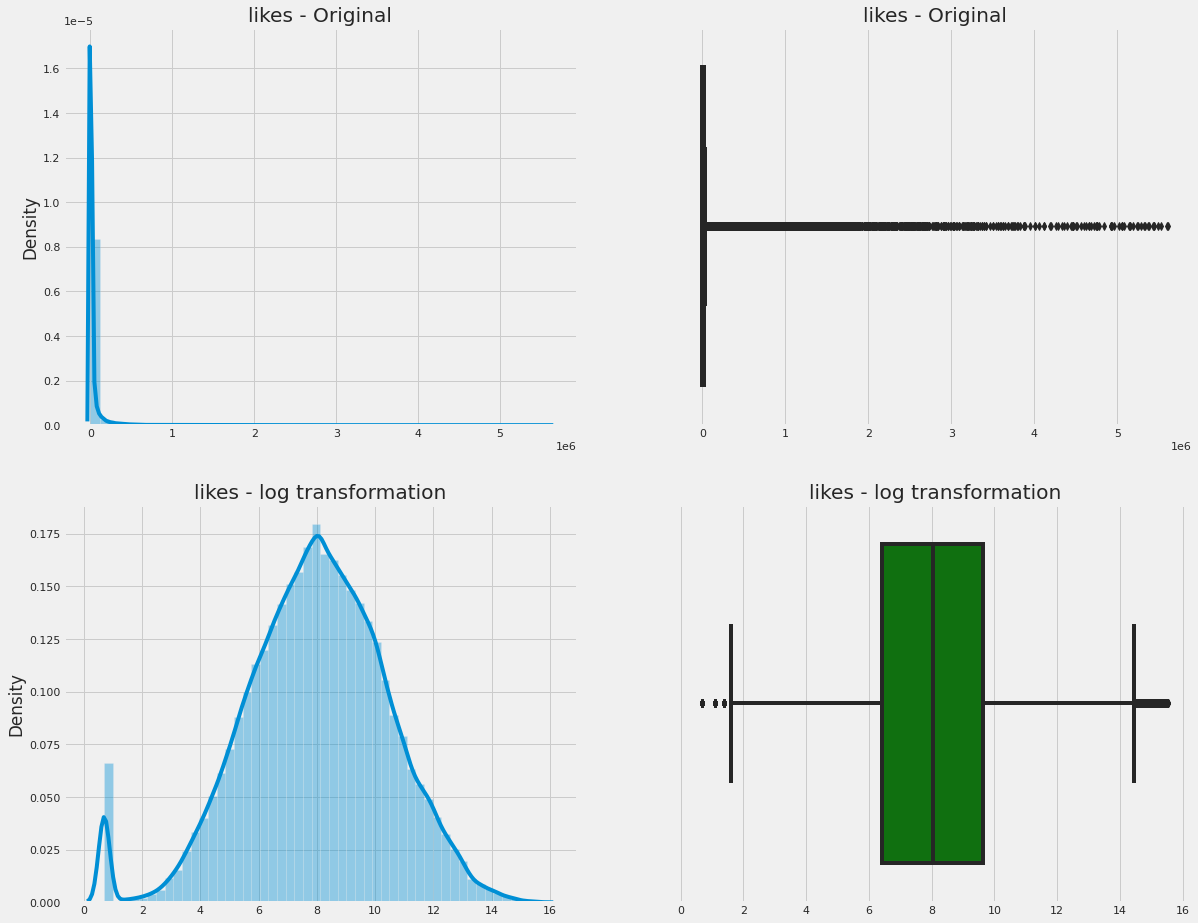

In [62]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

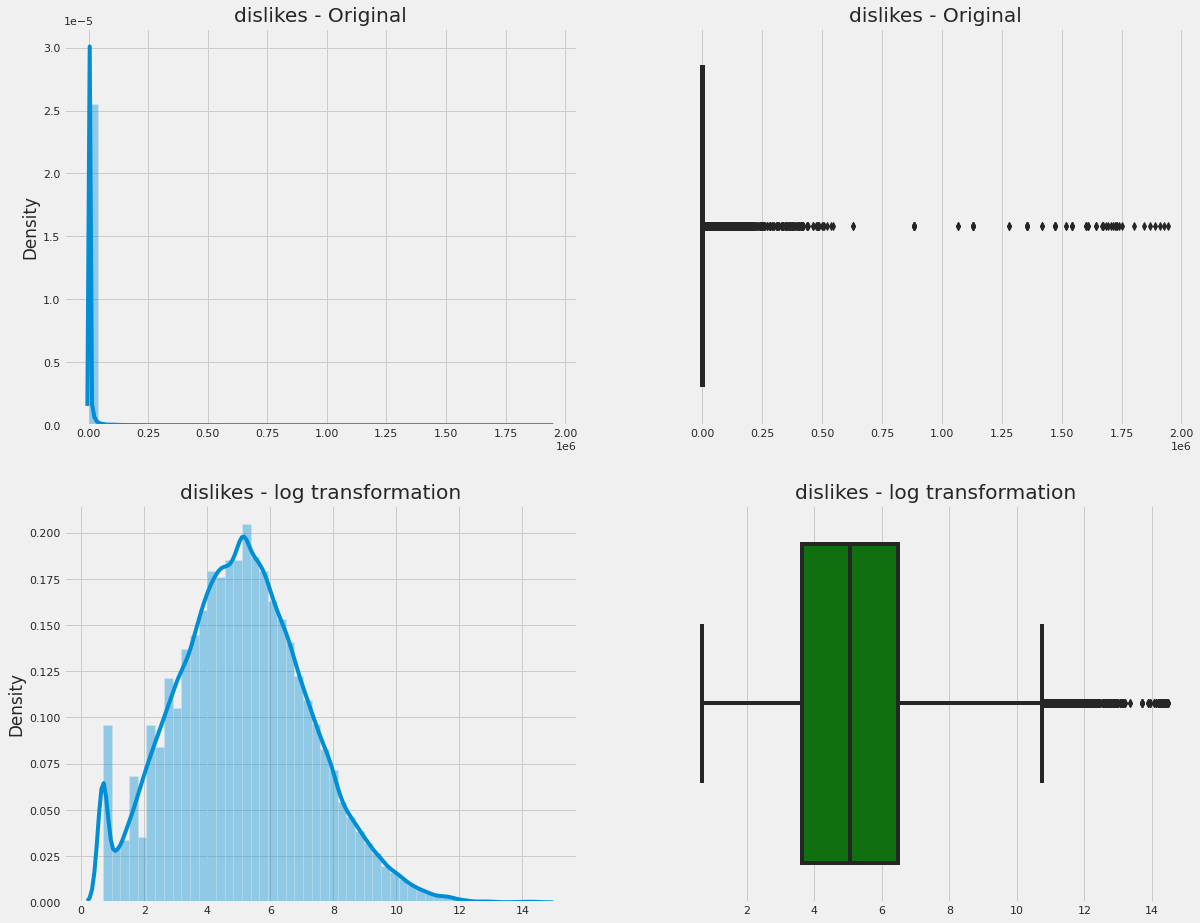

In [63]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

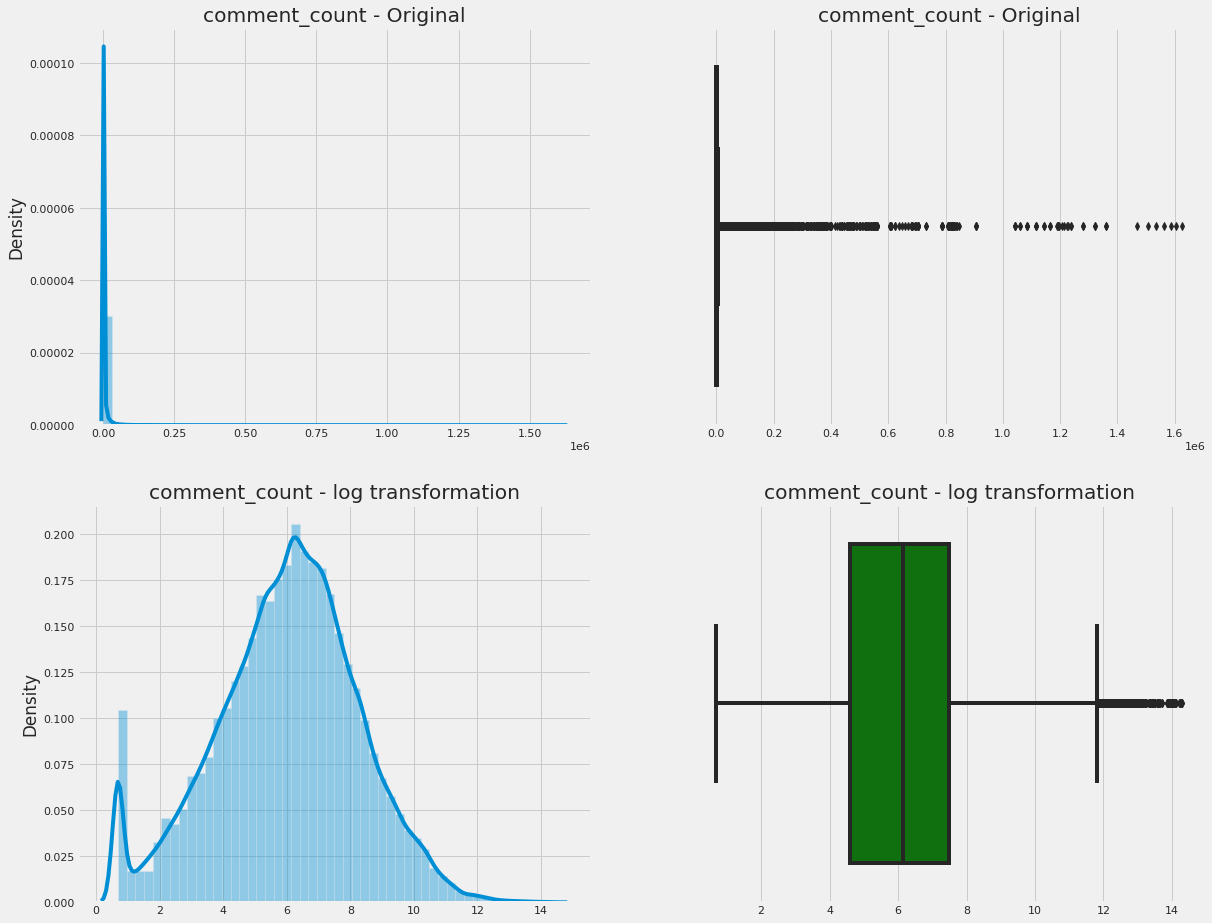

In [64]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

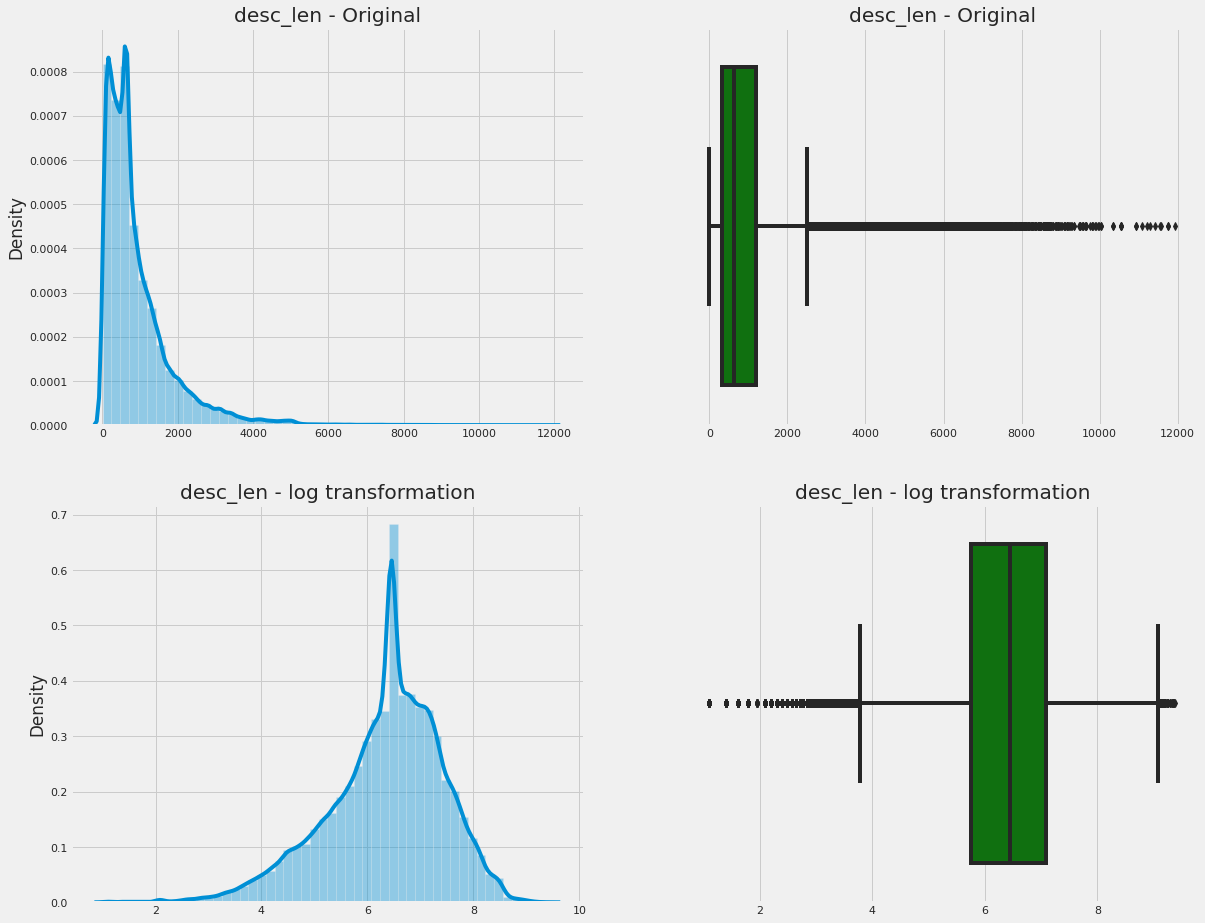

In [65]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

In [68]:
# f,ax = plt.subplots(2,2,figsize=(18,15))

# g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
# ax[0,0].set_title('No_tags - Original')
# ax[0,0].set_xlabel('')

# g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
# ax[0,1].set_title('No_tags - Original')
# ax[0,1].set_xlabel('')

# g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
# ax[1,0].set_title('No_tags - log transformation')
# ax[1,0].set_xlabel('')

# g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
# ax[1,1].set_title('No_tags - log transformation')
# ax[1,1].set_xlabel('')

Text(0.5, 0, '')

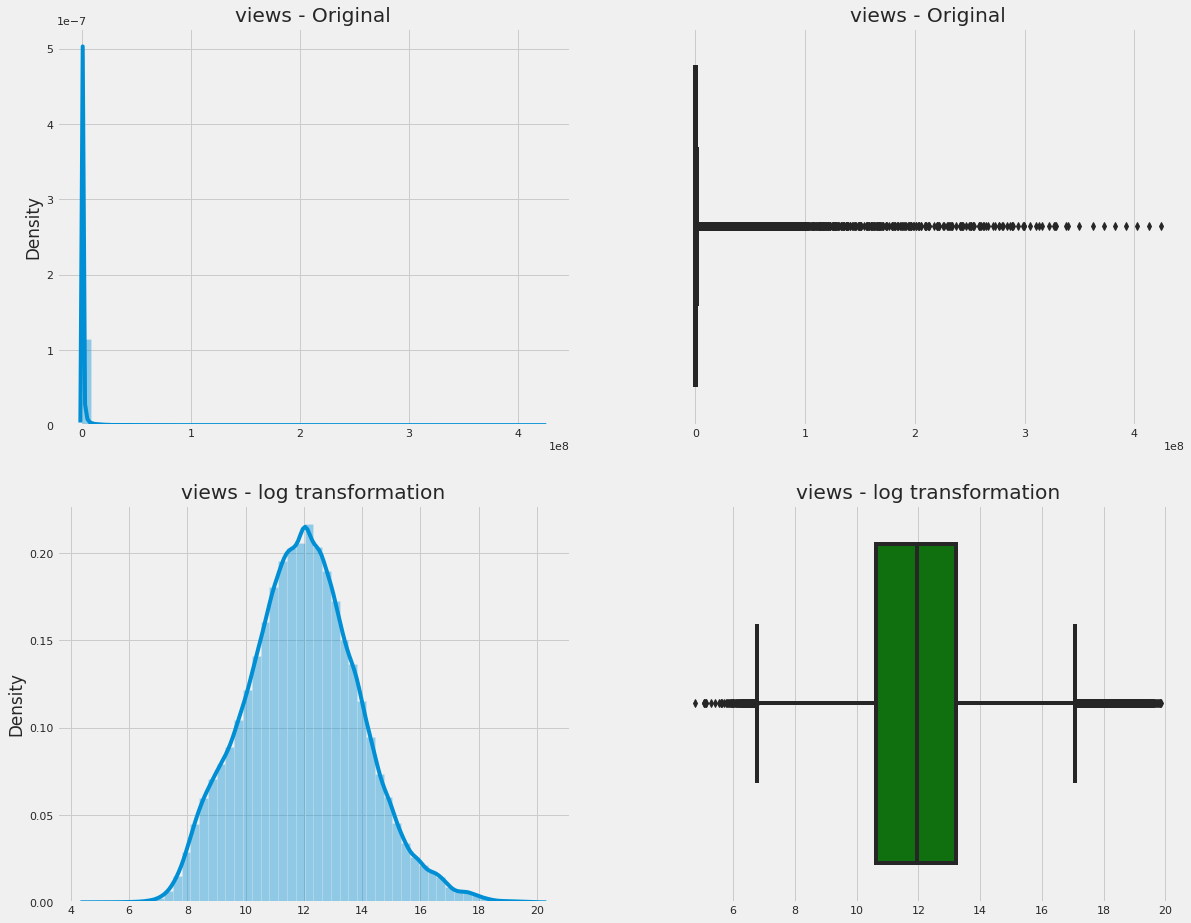

In [69]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [71]:
features = ['category_id','views','likes','dislikes','comment_count','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

## Normalization

In [75]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [76]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count,len_title,desc_len
count,338782.000000,3.387820e+05,3.387820e+05,3.387820e+05,3.387820e+05,338782.000000,338782.000000
mean,20.315781,1.225933e+06,3.444960e+04,2.010930e+03,3.874491e+03,14.658220,913.144825
std,7.061839,7.085148e+06,1.540537e+05,2.325056e+04,2.373931e+04,8.791872,918.579205
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,17.000000,4.159050e+04,6.020000e+02,3.600000e+01,9.800000e+01,9.000000,314.000000
50%,23.000000,1.540225e+05,3.079000e+03,1.570000e+02,4.640000e+02,13.000000,633.000000
75%,24.000000,5.470550e+05,1.513600e+04,6.500000e+02,1.780750e+03,17.000000,1191.000000
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,151.000000,11938.000000


In [77]:
df_pre.head()

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,log_comment_count,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_desc_len,std_len_title
0,Jw1Y-zhQURU,17.14.11,26.0,7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,...,9.156940,6.711740,2.397895,0.581395,0.017017,0.009919,0.005268,0.005828,0.068694,0.060000
1,3s1rvMFUweQ,17.14.11,24.0,1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,...,7.922261,6.035481,2.995732,0.534884,0.002482,0.004553,0.001179,0.001695,0.034850,0.120000
2,n1WpP7iowLc,17.14.11,10.0,17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,...,11.743108,6.388561,2.397895,0.209302,0.040417,0.140264,0.022324,0.077394,0.049677,0.060000
3,PUTEiSjKwJU,17.14.11,17.0,27833.0,193.0,12.0,37.0,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,...,3.637586,5.983936,3.295837,0.372093,0.000065,0.000034,0.000006,0.000023,0.033090,0.166667
4,rHwDegptbI4,17.14.11,25.0,9815.0,30.0,2.0,30.0,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,...,3.433987,5.023881,2.833213,0.558140,0.000023,0.000005,0.000001,0.000018,0.012566,0.100000


**Data Preprocessing**

**we take several steps in preprocessing</br>**

* Dropping the `publish_date`, `publish_time`, `description`, `tags`, `title`, and `channel_title` features because these features have their own unique value for each existing video
* Then we fill in the features that have missing values by using the mode of the feature (the `comments_disabled`, `video_error_or_removed`, and `ratings_disabled` features. This is done because this feature has categorical data so it's better to use the fill with the values that appear the most frequently.
* Features with numerical data are filled in with the median value of each feature, we do this because the median value is more representative of the entire data distribution and is also more robust even though there are outliers.
* After filling in the missing values, we drop 5067 duplicated data rows
* The transformation log is carried out on features with numerical data values to convert them to normal / almost normal distributions, this is done because there are several features that have a skewed data distribution.
* Finally, we normalized so that the scale of each numeric feature has the same scale and it is hoped that it can simplify the process of learning the machine learning model data that we created.

# Split Train & Test


<AxesSubplot:>

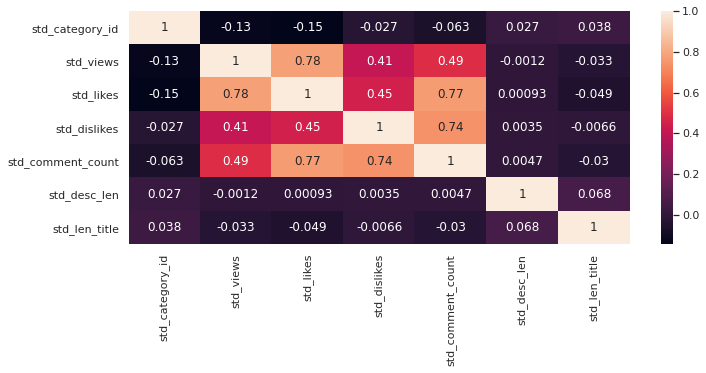

In [79]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_desc_len','std_len_title']].corr(), annot=True)
#plt.savefig('fig/split train test.png')

In [81]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_desc_len','std_len_title']] # Uses all the features except Target
y = df_pre['std_views']

In [85]:
x.shape

(338782, 6)

In [86]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

## Fit Simple Linear Regression Model

Fitting model to train set

In [87]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict

Predict the test set

In [88]:
pred = regressor.predict(xtest) #Predicting the views

In [89]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

## Evaluation

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [91]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [ 1.10554115e-04  6.67792971e-01  5.31527764e-01 -7.27115497e-01
 -1.59169461e-04  1.44684950e-03]
Intercept: 
 -0.00019473685692135336
MAE: 0.00
RMSE: 0.01
R2 score: 0.69


# Fit Ridge Regularization Model

In [92]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [93]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-1.76832267e-04  6.41026266e-01  4.67980576e-01 -6.39017381e-01
 -1.76376720e-04  1.43346776e-03]
Intercept: 
 -4.2769699600841895e-05
MAE: 0.00
RMSE: 0.01
R2 score: 0.69


## Randomized Search


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [95]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.47


# Fit Lasso Regularization Model

In [96]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [97]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.02
R2 score: -0.00


## Randomized Search

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [99]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.02
R2 score: -0.00


# Fit Elastic Net Regularization Model

In [100]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

ElasticNet()

In [101]:
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.02
R2 score: -0.00


## Randomized Search

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [103]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.69


# Fit Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.00
R2 score: 0.97


# Fit Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.00
R2 score: 0.99


Text(0.5, 1.0, 'feature importance score')

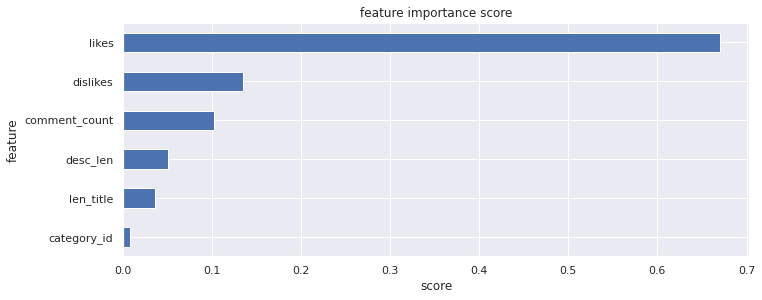

In [108]:
#make feature importance graph
X=data[['category_id','likes','dislikes','comment_count','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Fit Support Vector Regressor Model

In [109]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.07
RMSE: 0.07
R2 score: -17.36


**The model's performance is very bad because the R2 value is below the 0 value, which is -6.85**

# Save Model

In [110]:
import pickle
pickle.dump(best_model1, open('RandomForest_model.pkl', 'wb'))

In [111]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print('Model Score : ', str(round(result,2)*100), '%')

Model Score :  99.0 %


In [112]:
print('train accuracy : ', str(round(loaded_model.score(xtrain, ytrain),2)*100), '%')
print('test accuracy : ', str(round(loaded_model.score(xtest, ytest),2)*100), '%')

train accuracy :  100.0 %
test accuracy :  99.0 %


**The model we chose has very little tendency to overfitting, but we think it can be tolerated within normal reasonable limits, where the train accuracy has a value of 99,38% and the test accuracy has a value of 96,26%.**

# Conclusion

**Based on the experiments that have been carried out, there are several models that are good for determining the views of Youtube videos** </br>
* Random Forest with MAE 0.00, RMSE 0.01, and R2 of 0.96 makes Random Forest the best model so far
* Decision Tree is the second best sequence model after Random Forest with a slightly smaller R2 value of 0.92
* Elastic Net is the third best model with MAE 0.01, RMSE 0.01, and R2 0.80 values
* Ridge Regularization is the next best model with MAE values of 0.01, RMSE 0.01, and R2 of 0.79
* a very influential feature is the number of likes and dislikes of a video